## 03 앙상블 학습

- 앙상블 학습을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 집단지성 느낌



-보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세가지가 있으며, 그 외에도 다양한 앙상블 방법이 있다
- 보팅&배깅: 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 보팅은 서로 다른 알고리즘을 가진 분류기 결합
- 배깅은 같은 유형 알고리즘의 분류기이지만 데이터 샘플링을 서로 다르게 가져감

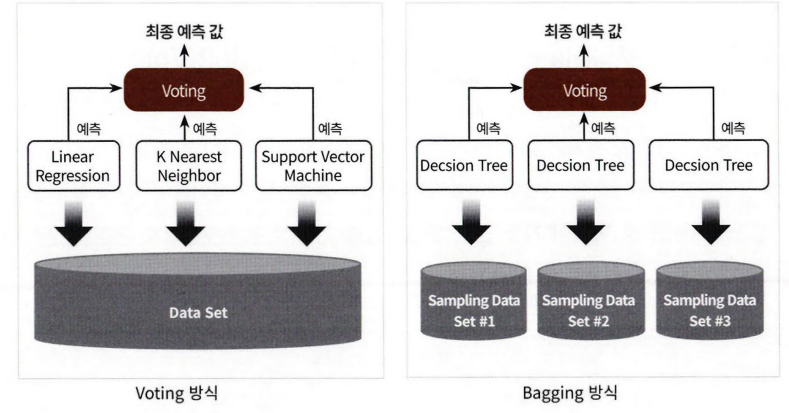

## 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- 하드 보팅은 다수결의 원칙, 즉 예측결과값 중 다수의 분류기가 결정한 예측값을 최종 보팅결과로
- 소프토 보팅은 분류기의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블값을 최종 보팅 결과로

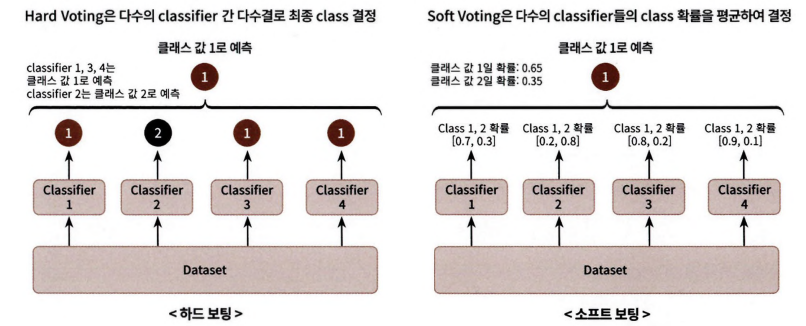

## 보팅 분류기(Voting Classifier)

로지스틱 회귀와 KNN 기반의 보팅 분류기

In [99]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [100]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred= classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


- 보팅 분류기가 정확도가 조금 더 높게 나타났지만, 여러개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측성능이 향상되는 건 x

## 04 랜덤 포레스트

- 배깅 (앞서 설명)
- 배깅의 대표 알고리즘은 '랜덤 포레스트'
- 랜덤 포레스트의 기반 알고리즘은 결정 트리
- 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임 (부트스트래핑)

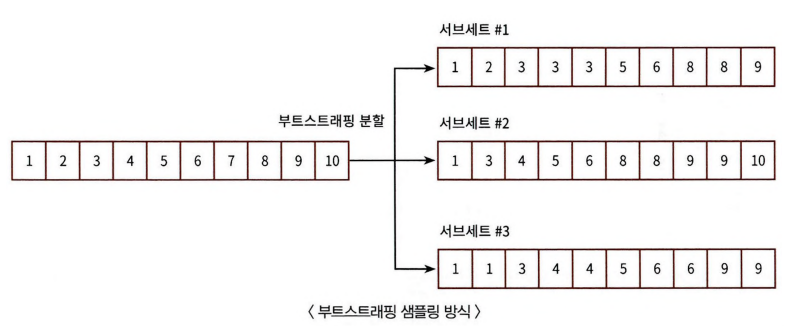

In [101]:
## 지난 과제에서의 코드 필요 ##

def get_new_feature_name_df(old_feature_name_df):
    # 중복 카운트 계산
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()

    # 데이터 병합
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')

    # 새로운 컬럼 이름 생성
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1
    )

    # 인덱스 컬럼 제거
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)

    return new_feature_name_df

In [102]:
## 지난과제에서의 코드 필요 ##

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자로 sep로 할당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name으로 부여
  X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame 모두 반환
  return X_train, X_test, y_train, y_test

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 그대로 사용
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


## 랜덤 포레스트 하이퍼 파라미터 및 튜닝

- 그나마 랜덤 포레스트가 파라미터가 적은 편에 속하는데, 결정 트리에서 사용되는
하이퍼 파라미터와 같은 파라미터가 대부분이기 때문

- 아래 코드는 GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝해보기

In [104]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1,6,12],
    'min_samples_split': [2,8,16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1) # n_jobs=-1 파라미터는 모든 CPU 코어를 이용해 학습 가능
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [105]:
# 위에서 이렇게 추출된 최적 하이퍼 파라미터로 다시 학습시킨 뒤 별도의 테스트 데이터로 예측 성능 측정
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9260


- 피처 중요도 시각화

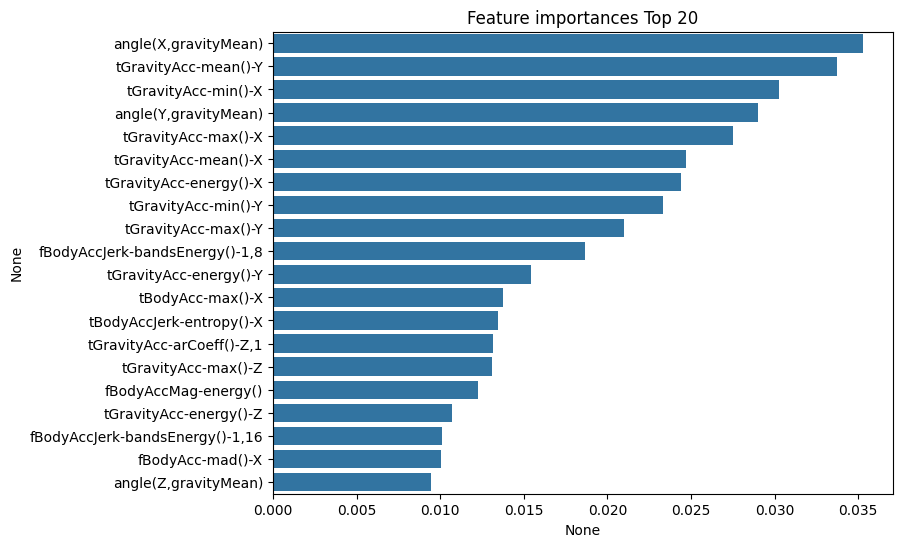

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 05 GBM(Gradient Boosting Machine)

- 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선하면서 학습하는 방식
- AdaBoost, Gradient Boost
- 아래는 먼저 에이다 부스트에 대한 그림

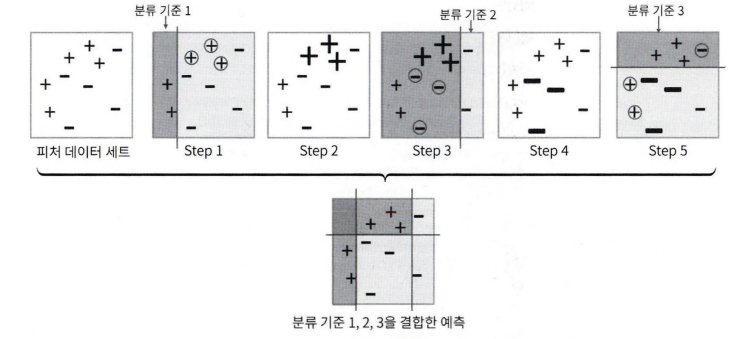

- step1 : 첫번째 약한 학습기가 분류기준 1로 +/- 분류. 동그라미로 표시된 +는 +데이터가 잘못 분류된 오류 데이터임
- step2: 오류 데이터에 대해 가중치 부여. 다음 약한 학습기가 더 잘 분류할 수 있게 크기 커짐
- step3: 두번째 약한 학습기가 분류기준 2로 +/- 분류. 동그라미로 표시된 -는 -데이터가 잘못 분류된 오류 데이터임
- step4: 오류 데이터에 대해 가중치 부여. 다음 약한 학습기가 더 잘 분류할 수 있게 크기 커짐
- step5: 세번째 약한 학습기가 분류기준 3으로 +/- 분류. 에이다부스트는 이렇게 약한 학습기가 순차적으로 오류값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행
- 마지막으로 맨 아래에는 첫번째, 두번째, 세번째 약한 학습기를 모두 결합한 결과 예측. 개별 약한 학습기보다 훨씬 정확도 올라감

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행시간 측정 위함. 시작 시간 설정
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time()-start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 1223.0초


- 사이킷런의 GradientBoostingClassifier는 약한 학습
기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬처리가 지원되지 않아서 대용량 데이터의 경우 학습에 매우 많은 시간이 필요. 반면 랜덤 포레스트는 상대적으로 빠른 수행 시간을 보장

## GBM 하이퍼 파라미터 소개

- loss: 경사 하강법에서 사용할 비용 함수를 지정한다. 특별한 이유가 없다면 디폴트 값 “deviance”를 적용
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률로서 weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수. 0~1 사이의 값을 지정할 수 있고 디폴트는 0.1. 값이 작을수록 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 크지만 수행 시간이 오래걸림
- n_estimators: weak learner의 갯수로 디폴트 값은 100
- subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율로 디폴트 값은 1이다. (과적합이 우려되는 경우 1보다 작은 값으로 설정)

## XGBoost(eXtra Gradient Boost)

- XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및
과적합 규제(Regularization) 부재 등의 문제를 해결

##### XGBoost 설치

In [1]:
pip install xgboost==1.5.1

In [2]:
import xgboost as xgb
from xgboost import XGBClassifier

### **파이썬 래퍼 XGBoost 하이퍼 파라미터**

- XGBoost는 GBM과 유사한 하이퍼 파라미터 + 조기 중단(early stopping), 과적합을 규제하기 위한 하이퍼 파라미터 등
- 파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost 모듈의 일부 하이퍼 파라미터는 약간 다르므로, 주의

일반 파라미터
- 일반적으로 실행 시 스레드의 갯수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없다.
  - booster: gbtree 또는 gblinear 중 선택, 디폴트는 gbtree
  - silent: 디폴트는 0이며, 출력 메시지를 나타내고 싶지 않은 경우 1로 설정
  - nthread: CPU의 실행 스레드 개수로 디폴트는 전체 CPU의 스레드를 사용

부스터 파라미터 (대부분의 하이퍼 파라미터는 여기에 속함)
- 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭한다.
  - eta [defalut: 0.3, alias: learning_rate]: GBM의 학습률(learning_rate)와 같은 파라미터로 보통 0.01 ~ 0.2 사이의 값을 선호한다.
  - num_boost_round: GBM의 n_estimators와 같은 파라미터
  - min_child_weight [default: 1]: 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 가중치 총합, 값이 클수록 분할을 자제한다. 과적합을 조절하기 위해 사용
  - gamma [default: 0, aias: min_split_loss]: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값, 해당 값보다 큰 손실(loss)이 감소된 경우 리프 노드를 분리하며 값이 클수록 과적합 감소 효과가 있다
  - max_depth [default: 6]: 트리 기반 알고리즘의 max_depth와 같다. 0을 지정하면 깊이 제한이 없다. 보통은 3 ~ 10 사이의 값을 적용한다.
  - sub_sample [default: 1]: GBM의 subsample과 같은 파라미터로 일반적으로 0.5 ~ 1 사이의 값을 사용한다.
  - colsample_bytree [default: 1]: GBM의 max_features와 유사하다. 트리 생성에 필요한 피처를 임의로 샘플링 하는데 사용, 피처가 매우 많은 경우 과적합을 조절하는데 사용
  - lambda [default: 1, alias: reg_lambda]: L2 Regularization 적용 값으로 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
  - alpha [default: 0, alias: reg_alpha]: L1 Regularization 적용 값으로 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
  - scale_pos_weight [default: 1]: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 셋의 균형 유지를 위한 파라미터

학습 태스크 파라미터
- 학습 수행시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터
  - objective: 최솟값을 가져야할 손실함수를 정의한다. 주로 사용하는 손실함수는 이진 분류인지 다중분류인지에 따라 다르다.
  - binary:logistic: 이진 분류일 때 사용
  - multi:softmax: 다중 분류일 때 적용, 손실함수가 multi:softmax인 경우에는 레이블 클래스 개수인 num_class 파라미터를 지정해야 한다.
  - multi:softprob: multi:softmax와 유사하지만 개별 레이블 클래스의 해당되는 예측 확률을 반환한다.
  - eval_metric: 검증에 사용되는 함수를 정의한다. 기본값은 회귀의 경우 rmse, 분류인 경우 error이다.(그외: mae, auc..)

과적합 문제가 심각한 경우
- eta 값을 낮춘다(0.01 ~ 0.1). eta 값을 낮출 경우 num_boost_rounds는 반대로 높여줘야 한다.
- max_depth 값을 낮춘다.

- min_child_weight 값을 높인다.

- gamma 값을 높인다.

- sub_sample과 colsample_bytree 등을 조정한다.


- 기본 GBM은 n_estimators에 지정된 횟수만큼 반복적으ㅗㄹ 학습 오류를 감소시키며 학습을 진행하면서 중간에 반복을 멈출 수 없다
- 그러나, XGBoost나 LightGBM은 모두 조기 중단 기능이 있다. 예를 들어 n_estimator=200, 조기중간 파라미터값을 50을 설정하면, 50회를 반복하는 동안 학습 오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료

##### **파이썬 래퍼 XGBoost 적용- 위스콘신 유방암 예측**

- 위스콘신 유방암 예측 데이터 세트: 종양의 크기,모양 등 속성값을 기반으로 악성 종양(maligant)인지 양성 종양(benign)인지 분류한 데이터 세트
- 종양의 다양한 피처에 따라
악성종양(malignant) 인지 일반 양성종양(benign) 인지를 XGBoost를 이용해 예측
- 악성:0, 양성:1

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [5]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


- xgboost.DMatrix는 데이터를 내부적으로 numpy.ndarray 형식으로 변환하려고 시도한다. xgboost.DMatrix에 데이터를 넘길 때, pandas.DataFrame을 numpy.ndarray로 변환하여 문제를 피할 수 있다. DataFrame의 .values 속성을 사용하여 데이터 배열을 추출할 수 있다.

In [6]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr.values)
dval = xgb.DMatrix(data=X_val.values, label=y_val.values)
dtest = xgb.DMatrix(data=X_test.values, label=y_test.values)

###### 학습

In [7]:
params = { 'max_depth':3,
          'eta':0.5, # XGBCIassifier에서는 eta가 아니라 learning_rate
           'objective':'binary:logistic', # 이진 분류 목적함수
           'eval_metric':'logloss' # 평가 성능 지표
           }
num_rounds = 400 #부스팅 반복 횟수는 400회

In [8]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기함
eval_list = [(dtr,'train'), (dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds,\
                      early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.35554	eval-logloss:0.45915
[1]	train-logloss:0.21879	eval-logloss:0.35750
[2]	train-logloss:0.14308	eval-logloss:0.30244
[3]	train-logloss:0.10146	eval-logloss:0.27501
[4]	train-logloss:0.07421	eval-logloss:0.26152
[5]	train-logloss:0.05751	eval-logloss:0.26290
[6]	train-logloss:0.04717	eval-logloss:0.27088
[7]	train-logloss:0.03729	eval-logloss:0.27125
[8]	train-logloss:0.03133	eval-logloss:0.29146
[9]	train-logloss:0.02748	eval-logloss:0.29061
[10]	train-logloss:0.02375	eval-logloss:0.29161
[11]	train-logloss:0.02058	eval-logloss:0.29964
[12]	train-logloss:0.01792	eval-logloss:0.27732
[13]	train-logloss:0.01636	eval-logloss:0.27806
[14]	train-logloss:0.01472	eval-logloss:0.27727
[15]	train-logloss:0.01350	eval-logloss:0.26936
[16]	train-logloss:0.01233	eval-logloss:0.26380
[17]	train-logloss:0.01144	eval-logloss:0.26799
[18]	train-logloss:0.01114	eval-logloss:0.26521
[19]	train-logloss:0.01026	eval-logloss:0.26545
[20]	train-logloss:0.00966	eval-logloss:0.25249
[2

- 학습 반복 시마다 evals에 설정된 데이터 세트에 대해 평가지표가 출력됨
- train()은 학습이 완료된 모델 객체를 반환

- 학습을 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소하고 있다. 하지만 num_boost_round를 400회로 설정했음에도 불구하고 학습은 400번을 반복하지 않고 118번째에서 완료.
- 이후 87번에서 118번까지 early_stopping_rounds로 지정된 50회 동안 logloss 값은 이보다 향상되지 않았기 때문에(logloss가 작을수록 성능이 좋습니다) 더 이상 반복하지 않고 멈춘 것임

###### 예측

In [9]:
# 학습 완료했으니 테스트 데이터 세트에 예측을 수행
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크다면 1, 그렇지 않다면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.982 0.005 0.6   0.008 0.989 1.    1.    1.    0.999 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [10]:
# 3장에서 사용한 성능 평가 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)

    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [11]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9930


###### xgboost에 내장된 시각화 기능

- xgboost의 plot_importance() API는 피처의 중요도를 막대그래프 형식으로 나타냄
- 사이킷런은 Estimator 객체의 feature_importances_속성을 이용해 직접 시각화 코드를 작성해야 하지만, xgboost 패키지는 plot_importance( )를 이용해 바로 피처 중요도를 시각화

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

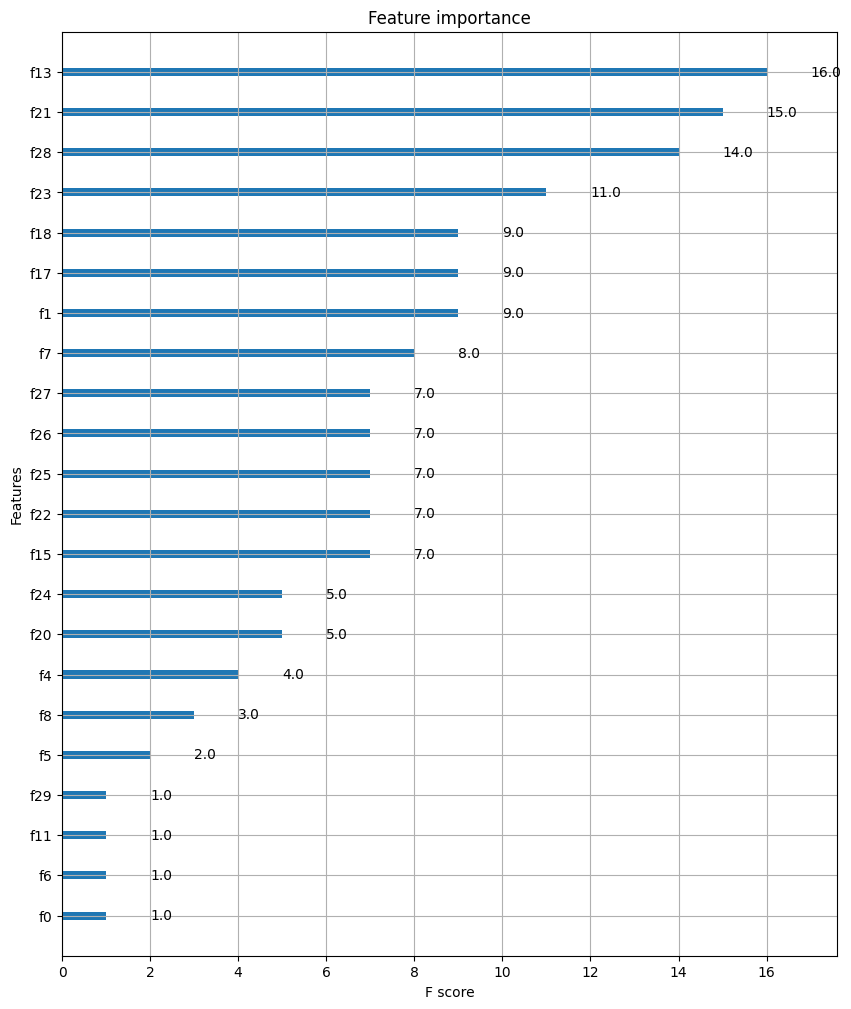

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

### **사이킷런 래퍼 XGBoost의 개요 및 적용**

- 사이킷런을 위한 래퍼XGBoost는 크게 분류를 위해 래퍼 클래스인 XGBClassifer, 회귀를 위한 XGBRegressor임
- 다른 Estimator와 동일하게 fit( )과 predict( )만으로 학습과 예측이 가능하고 GridSearchCV, Pipeline 등 사이킷런의 다른 유틸리티를 그대로 사용
- 파이썬 래퍼 XGBoost와 사이킷런 래퍼 XGBoost의 하이퍼 파라미터에 약간 차이가 있음
  - XGBClassifier는 기존 사이킷런에서 일반적으로 사용하는 하이퍼 파라미터와 호
환성을 유지하기 위해 기존의 xgboost 모듈에서 사용하던 네이티브 하이퍼 파라미터 몇 개를 다음과 같이 변경
    - eta -> learning_rate
    - sub_sample -> subsample
    - lambda -> reg_lambda
    - alpha -> reg_alpha
  - xgboost의 n_estimators와 num_boost_bound 하이퍼 파라미터는 서로 동일한 파라미터임. 만일 두개가 동시에 사용되면 파이썬 래퍼 XGBoost API에서는 n_estimators 파라미터를 무시하고 num boost round 파라미터를 적용. 하지만 XGBClassifier와 같은 사이킷런 래퍼
XGBoost 클래스에서는 n_esrimators 파라미터를 적용

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifer 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')

xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC: 0.9954


In [ ]:
# 사이킷런 래퍼 XGBoost에서 조기 중단 수행하기
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

- n_estimators가 400이지만 400번을 반복하지 않고 파이썬 래퍼의 조기 중단과 동일하게 176번
째 반복에서 학습을 마무리. 마찬가지로 126번째 반복에서 검증 데이터 세트의 성능 평가인 validation^—logloss가 0.25587로 가장 낮았고, 이후 50번 반복까지 더 이상 성능이 향상되지 않았기 때문에 학습이 조기 종료됨

In [ ]:
get_clf_eval(y_test,ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9933


##### 하지만 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 크다. 만약 early_stopping_rounds를 10으로 하면 아직 성능이 향상될 여지가 있음에도 불구하고 10번 반복하는 동안 성능 평가지표가 향상되지 않으면 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있음

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss',eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

###### 피처 중요도 시각화 - 파이썬 래퍼 클래스와 마찬가지로 사이킷런 래퍼 클래스도 plot_importance() API 적용 가능

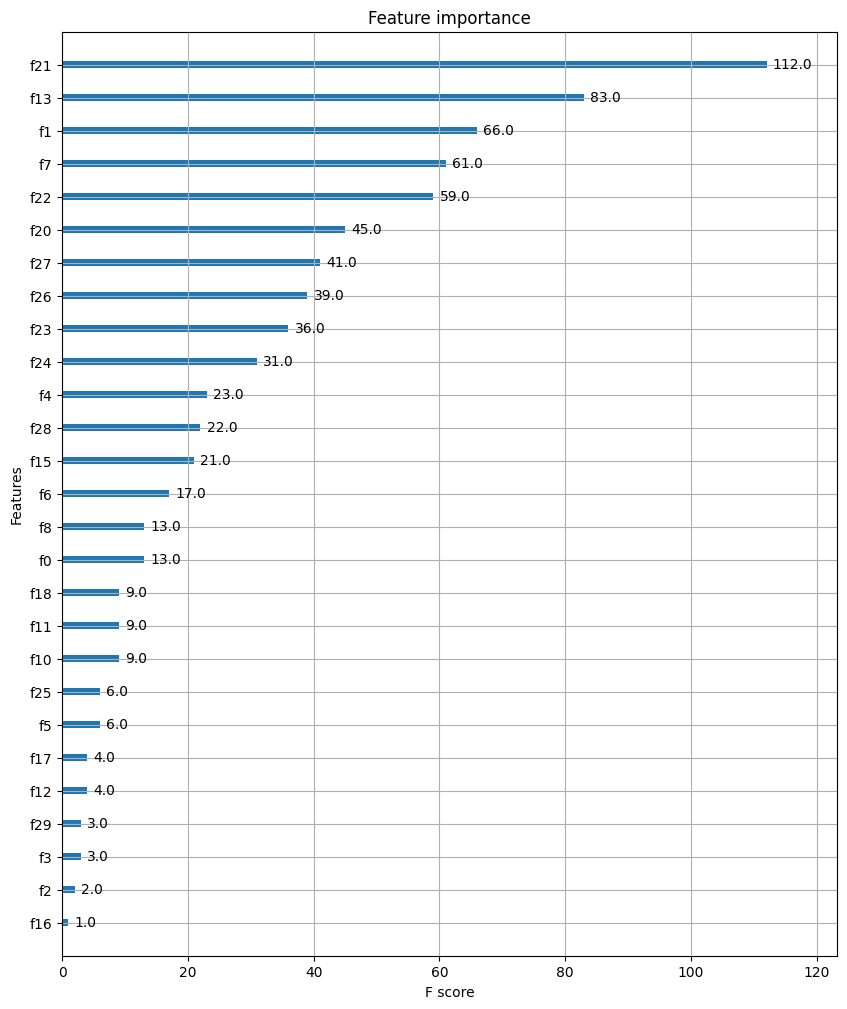

In [111]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)